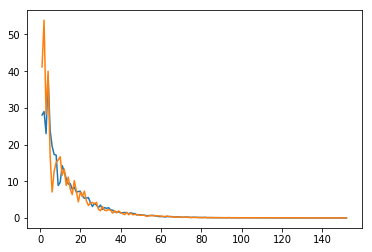

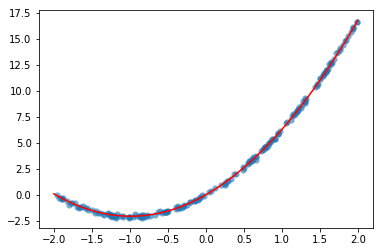

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import random  

model_capacity=2       #容量初始化  
loss = 10               #loss先定义一个数，为了进入循环迭代  
step_size = 0.01        #步长  
eps =0.005               #精度要求  
max_iters = 300        #最大迭代次数  
error =0                #损失值  
iter_count = 0          #当前迭代次数  
batch_size=32           #批量大小，一般取2的次方
theta=[0.5 for x in range(model_capacity+1)]     #权值初始化
rand=[1 for x in range(batch_size)]            #随机数初始化
rand_t=[1 for x in range(batch_size)]          #训练集的随机数初始化
pred_y=[1 for x in range(batch_size)]          #y的预测值
pre_y=[1 for x in range(batch_size)]
train_loss=[]             #记录初始值
train_count=[]           
test_loss=[]
train_pred_y=[]
train_pred_x=[]
                          #创建数据集，加入白噪声
x = np.random.uniform(-3, 3, size=1000)
X = x.reshape(-1, 1)
Y = 2.11 * x**2 + 4.2*x  + np.random.normal(0, 0.1, 1000)

train_x=x[:500]                #切分数据集为训练集和测试集
train_y=Y[:500]                #为了凸显泛化误差，训练集取一半而不是8:2
test_x=x[500:1000]
test_y=Y[500:1000]
                                                      #训练集训练权值
while(loss > eps and iter_count < max_iters):  #迭代条件  
    loss = 0 
    loss2 = 0 
    n=train_x.shape[0]                 #n为样本总数
    m=model_capacity                   #m为维度
    for i in range(batch_size):            #取随机的样本
        rand[i]=int(random.randint(0,n-1))      #这里每次批量选取的是batch_size组样本进行更新，训练集随机数
        rand_t[i]=int(random.randint(0,n-1))    #测试集随机数
    for j in range(m):                    
        d_J=0            
        for i in range(batch_size):
            pred_y[i]=0          
            pre_y[i]=0  
            for k in range(m):                    
                pred_y[i] += theta[k]*train_x[rand[i]]**(k+1)
                pre_y[i] += theta[k]*test_x[rand_t[i]]**(k+1)
            d_J = (pred_y[i] - train_y[rand[i]])*train_x[rand[i]]**(j+1) + d_J    #代价函数的变化量
        theta[j] = theta[j] - step_size * (1/batch_size) * d_J                    #更新权值   
    for i in range (batch_size):  
        error = (1/(2*batch_size))*(pred_y[i] - train_y[rand[i]])**2              #训练损失值  
        loss = loss + error       #训练总损失值            
        error2 = (1/(2*batch_size))*(pre_y[i] - test_y[rand_t[i]])**2             #测试损失值  
        loss2 = loss2 + error2    #测试总损失值
    iter_count += 1                      #计数+1
    train_loss.append(loss)  
    train_count.append(iter_count)
    test_loss.append(loss2)  

                                                    #方便显示，取少量样本
x1 = np.random.uniform(-2, 2, size=200)
X1 = x1.reshape(-1, 1)
Y1 = 2.11 * x1**2 + 4.2*x1  + np.random.normal(0, 0.1, 200)
last_y=0                                     #最终拟合的曲线
last_x = np.linspace(-2, 2)
for k in range(m):                    
    last_y += theta[k]*last_x**(k+1)



plt.figure(1)
plt.plot(train_count,train_loss)
plt.plot(train_count,test_loss)
plt.figure(2)
plt.scatter(X1,Y1,linewidths=0.1,alpha=0.6)
plt.plot(last_x,last_y,c='r')
plt.show()


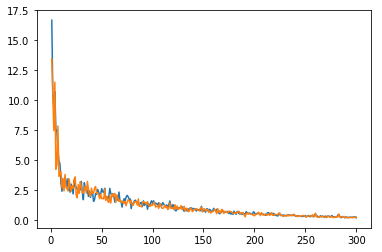

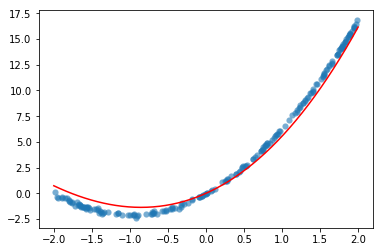

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import random  

model_capacity=3       #容量初始化  
loss = 10               #loss先定义一个数，为了进入循环迭代  
step_size = 0.01        #步长  
eps =0.005               #精度要求  
max_iters = 300        #最大迭代次数  
error =0                #损失值  
iter_count = 0          #当前迭代次数  
batch_size=32           #批量大小，一般取2的次方
theta=[0.5 for x in range(model_capacity+1)]     #权值初始化
rand=[1 for x in range(batch_size)]            #随机数初始化
rand_t=[1 for x in range(batch_size)]          #训练集的随机数初始化
pred_y=[1 for x in range(batch_size)]          #y的预测值
pre_y=[1 for x in range(batch_size)]
train_loss=[]             #记录初始值
train_count=[]           
test_loss=[]
train_pred_y=[]
train_pred_x=[]
                          #创建数据集，加入白噪声
x = np.random.uniform(-3, 3, size=1000)
X = x.reshape(-1, 1)
Y = 2.11 * x**2 + 4.2*x  + np.random.normal(0, 0.1, 1000)

train_x=x[:500]                #切分数据集为训练集和测试集
train_y=Y[:500]                #为了凸显泛化误差，训练集取一半而不是8:2
test_x=x[500:1000]
test_y=Y[500:1000]
                                                      #训练集训练权值
while(loss > eps and iter_count < max_iters):  #迭代条件  
    loss = 0 
    loss2 = 0 
    n=train_x.shape[0]                 #n为样本总数
    m=model_capacity                   #m为维度
    for i in range(batch_size):            #取随机的样本
        rand[i]=int(random.randint(0,n-1))      #这里每次批量选取的是batch_size组样本进行更新，训练集随机数
        rand_t[i]=int(random.randint(0,n-1))    #测试集随机数
    for j in range(m):                    
        d_J=0            
        for i in range(batch_size):
            pred_y[i]=0          
            pre_y[i]=0  
            for k in range(m):                    
                pred_y[i] += theta[k]*train_x[rand[i]]**(k+1)
                pre_y[i] += theta[k]*test_x[rand_t[i]]**(k+1)
            d_J = (pred_y[i] - train_y[rand[i]])*train_x[rand[i]]**(j+1) + d_J    #代价函数的变化量
        theta[j] = theta[j] - step_size * (1/batch_size) * d_J                    #更新权值   
    for i in range (batch_size):  
        error = (1/(2*batch_size))*(pred_y[i] - train_y[rand[i]])**2              #训练损失值  
        loss = loss + error       #训练总损失值            
        error2 = (1/(2*batch_size))*(pre_y[i] - test_y[rand_t[i]])**2             #测试损失值  
        loss2 = loss2 + error2    #测试总损失值
    iter_count += 1                      #计数+1
    train_loss.append(loss)  
    train_count.append(iter_count)
    test_loss.append(loss2)  

                                                    #方便显示，取少量样本
x1 = np.random.uniform(-2, 2, size=200)
X1 = x1.reshape(-1, 1)
Y1 = 2.11 * x1**2 + 4.2*x1  + np.random.normal(0, 0.1, 200)
last_y=0                                     #最终拟合的曲线
last_x = np.linspace(-2, 2)
for k in range(m):                    
    last_y += theta[k]*last_x**(k+1)



plt.figure(1)
plt.plot(train_count,train_loss)
plt.plot(train_count,test_loss)
plt.figure(2)
plt.scatter(X1,Y1,linewidths=0.1,alpha=0.6)
plt.plot(last_x,last_y,c='r')
plt.show()


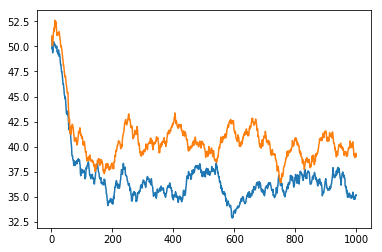

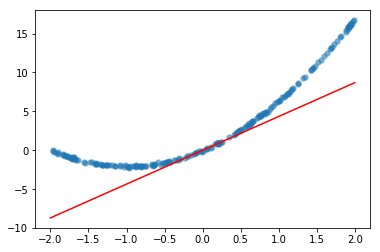

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import random  

model_capacity=1       #容量初始化  
loss = 10               #loss先定义一个数，为了进入循环迭代  
step_size = 0.01        #步长  
eps =0.005               #精度要求  
max_iters = 1000        #最大迭代次数  
error =0                #损失值  
iter_count = 0          #当前迭代次数  
batch_size=32           #批量大小，一般取2的次方
theta=[0.5 for x in range(model_capacity+1)]     #权值初始化
rand=[1 for x in range(batch_size)]            #随机数初始化
rand_t=[1 for x in range(batch_size)]          #训练集的随机数初始化
pred_y=[1 for x in range(batch_size)]          #y的预测值
pre_y=[1 for x in range(batch_size)]
loss_aver=[50 for x in range(70)]
loss2_aver=[50 for x in range(70)]
train_loss=[]             #记录初始值
train_count=[]           
test_loss=[]    
train_pred_y=[]
train_pred_x=[]

loss_1=0
                          #创建数据集，加入白噪声
x = np.random.uniform(-3, 3, size=1000)
X = x.reshape(-1, 1)
Y = 2.11 * x**2 + 4.2*x  + np.random.normal(0, 0.1, 1000)

train_x=x[:500]                #切分数据集为训练集和测试集
train_y=Y[:500]                #为了凸显泛化误差，训练集取一半而不是8:2
test_x=x[500:1000]
test_y=Y[500:1000]
                                                      #训练集训练权值
while(iter_count < max_iters):  #迭代条件  
    loss = 0 
    loss2 = 0 
    n=train_x.shape[0]                 #n为样本总数
    m=model_capacity                   #m为维度
    for i in range(batch_size):            #取随机的样本
        rand[i]=int(random.randint(0,n-1))      #这里每次批量选取的是batch_size组样本进行更新，训练集随机数
        rand_t[i]=int(random.randint(0,n-1))    #测试集随机数
    for j in range(m):                    
        d_J=0            
        for i in range(batch_size):
            pred_y[i]=0          
            pre_y[i]=0  
            for k in range(m):                    
                pred_y[i] += theta[k]*train_x[rand[i]]**(k+1)
                pre_y[i] += theta[k]*test_x[rand_t[i]]**(k+1)
            d_J = (pred_y[i] - train_y[rand[i]])*train_x[rand[i]]**(j+1) + d_J    #代价函数的变化量
        theta[j] = theta[j] - step_size * (1/batch_size) * d_J                    #更新权值   
    for i in range (batch_size):  
        error = (1/(2*batch_size))*(pred_y[i] - train_y[rand[i]])**2              #训练损失值  
        loss = loss + error       #训练总损失值
        error2 = (1/(2*batch_size))*(pre_y[i] - test_y[rand_t[i]])**2             #测试损失值  
        loss2 = loss2 + error2    #测试总损失值
    
    for i in range(50):                      #平滑化
        loss_aver[50]=loss
        loss_aver[60]+=loss_aver[i]
        loss_aver[i]=loss_aver[i+1]
    loss=loss_aver[60]/50
    loss_aver[60]=0

    for i in range(50):
        loss2_aver[50]=loss2
        loss2_aver[60]+=loss2_aver[i]
        loss2_aver[i]=loss2_aver[i+1]
    loss2=loss2_aver[60]/50
    loss2_aver[60]=0

    iter_count += 1                      #计数+1
    train_loss.append(loss)  
    train_count.append(iter_count)
    test_loss.append(loss2)  

                                                    #方便显示，取少量样本
x1 = np.random.uniform(-2, 2, size=200)
X1 = x1.reshape(-1, 1)
Y1 = 2.11 * x1**2 + 4.2*x1  + np.random.normal(0, 0.1, 200)
last_y=0                                     #最终拟合的曲线
last_x = np.linspace(-2, 2)
for k in range(m):                    
    last_y += theta[k]*last_x**(k+1)



plt.figure(1)
plt.plot(train_count,train_loss)
plt.plot(train_count,test_loss)
plt.figure(2)
plt.scatter(X1,Y1,linewidths=0.1,alpha=0.6)
plt.plot(last_x,last_y,c='r')
plt.show()
